In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# Load the dataset
file_path = "/content/glass.xlsx"  # Update this if necessary
xls = pd.ExcelFile(file_path)

# Display available sheets
print("Available Sheets:", xls.sheet_names)

# Load the data
df = pd.read_excel(xls, sheet_name="glass")
print("\nFirst 5 Rows of the Dataset:\n", df.head())

# Dataset Info
print("\nDataset Information:\n", df.info())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Available Sheets: ['Description', 'glass']

First 5 Rows of the Dataset:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-nul

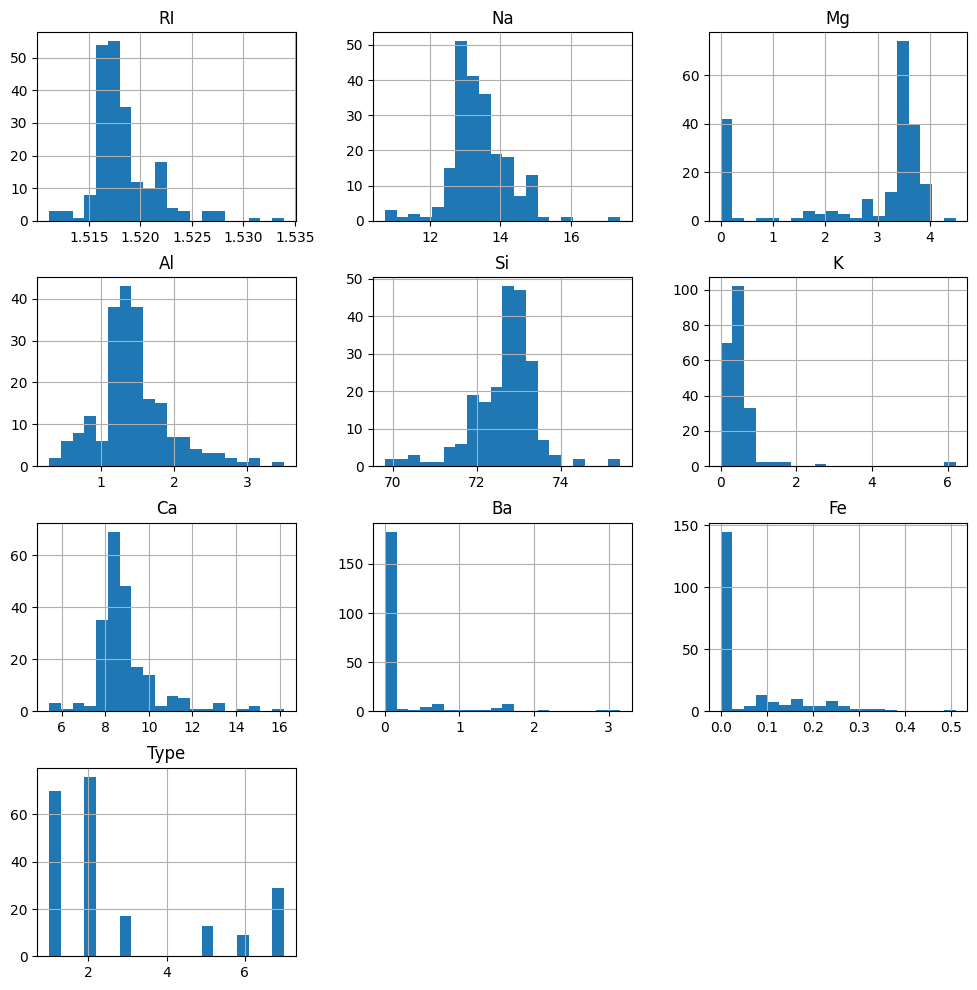

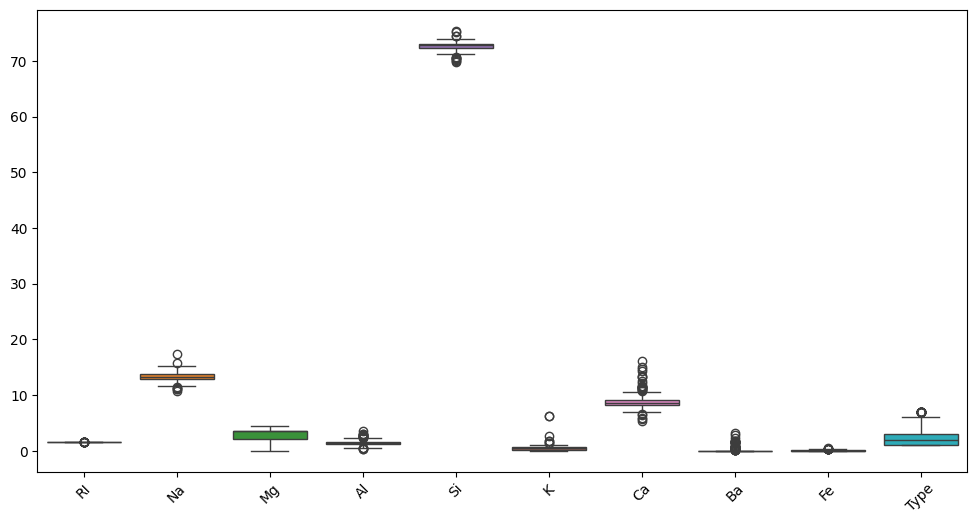

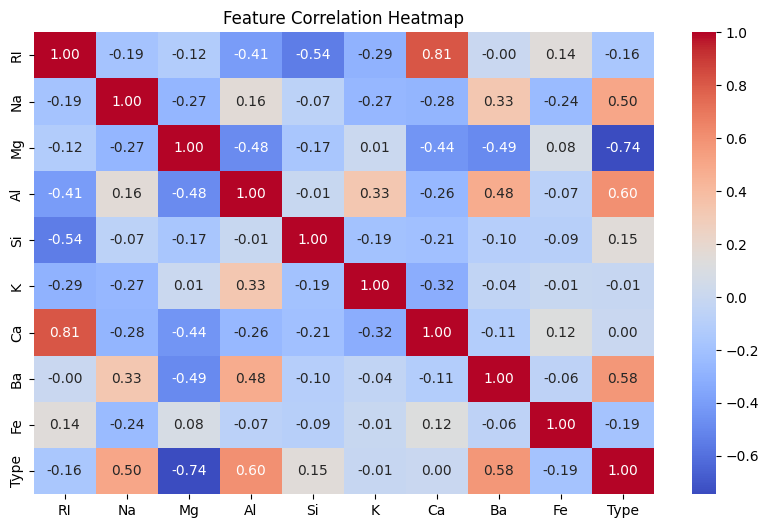

In [16]:
# Histograms
df.hist(figsize=(12, 12), bins=20)
plt.show()

# Boxplots to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
# Check for categorical variables
print("\nData Types:\n", df.dtypes)

# Convert categorical labels (Type column) to numerical using Label Encoding
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])

# Feature Scaling
scaler = StandardScaler()
features = df.drop(columns=["Type"])
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled["Type"] = df["Type"]

# Splitting data
X = df_scaled.drop(columns=["Type"])
y = df_scaled["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)



Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Training Data Shape: (171, 9)
Testing Data Shape: (43, 9)


In [18]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model Accuracy: 0.813953488372093

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.85      0.73      0.79        15
           2       0.67      0.67      0.67         3
           3       1.00      0.67      0.80         3
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43


Confusion Matrix:
 [[12  1  1  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [19]:
# Bagging Classifier (Using Random Forest as base estimator)
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                  n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_bag_pred = bagging_model.predict(X_test)

# Boosting Classifier (Using AdaBoost)
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  # Use 'estimator' instead of 'base_estimator'
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
boosting_model.fit(X_train, y_train)
y_boost_pred = boosting_model.predict(X_test)

# Evaluate Bagging Model
print("\nBagging Accuracy:", accuracy_score(y_test, y_bag_pred))
print("\nBagging Classification Report:\n", classification_report(y_test, y_bag_pred))
print("\nBagging Confusion Matrix:\n", confusion_matrix(y_test, y_bag_pred))

# Evaluate Boosting Model
print("\nBoosting Accuracy:", accuracy_score(y_test, y_boost_pred))
print("\nBoosting Classification Report:\n", classification_report(y_test, y_boost_pred))
print("\nBoosting Confusion Matrix:\n", confusion_matrix(y_test, y_boost_pred))



Bagging Accuracy: 0.7906976744186046

Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.73      0.73      0.73        15
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         3
           4       0.67      1.00      0.80         2
           5       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.79      0.81        43
weighted avg       0.81      0.79      0.79        43


Bagging Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]

Boosting Accuracy: 0.7441860465116279

Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.73      0.73      0.73      

In [21]:
# Interview Questions and Answers

# 1. Bagging vs Boosting
print("### 1. Bagging vs Boosting ###\n")

print("**Bagging (Bootstrap Aggregating):**")
print("- Trains multiple models (weak learners) independently using different random subsets of the dataset.")
print("- Reduces variance and prevents overfitting.")
print("- Suitable for high-variance models like decision trees.")
print("- Example: Random Forest (which uses bagging with decision trees).\n")

print("**Boosting:**")
print("- Sequentially trains models, where each new model focuses on the errors of the previous one.")
print("- Reduces bias and improves accuracy but can overfit if not carefully tuned.")
print("- Example: AdaBoost, Gradient Boosting, XGBoost.\n")

print("**Key Difference:** Bagging reduces variance by training models in parallel, while Boosting reduces bias by training models sequentially.\n")

# 2. Handling Imbalanced Data
print("### 2. Handling Imbalanced Data ###\n")

print("**Resampling Techniques:**")
print("- Oversampling: Duplicates minority class samples to balance the dataset (e.g., SMOTE – Synthetic Minority Over-sampling Technique).")
print("- Undersampling: Removes samples from the majority class to balance the dataset (can lead to loss of information).\n")

print("**Algorithm Adjustments:**")
print("- Assign class weights (`class_weight='balanced'` in scikit-learn) to give more importance to minority classes.")
print("- Use specialized models like Balanced Random Forest or SMOTEBoost for better handling of imbalanced data.\n")

# 3. Difference between Label Encoding & One-Hot Encoding
print("### 3. Difference between Label Encoding & One-Hot Encoding ###\n")

print("**Label Encoding:**")
print("- Converts categorical variables into numerical labels.")
print("  Example: 'A', 'B', 'C' → 0, 1, 2")
print("- Works well for ordinal categories (where order matters).")
print("- Risk: It may introduce unintended relationships between values (e.g., 'B' being closer to 'C' than 'A').\n")

print("**One-Hot Encoding:**")
print("- Converts categories into binary vectors.")
print("  Example: 'A', 'B', 'C' → [1,0,0], [0,1,0], [0,0,1]")
print("- Prevents unintended order relationships.")
print("- Downside: Can increase the number of features, leading to higher memory usage (curse of dimensionality).\n")

print("**Key Difference:** Label Encoding is compact but may introduce unintended order relationships, while One-Hot Encoding is safer but increases feature dimensionality.")


### 1. Bagging vs Boosting ###

**Bagging (Bootstrap Aggregating):**
- Trains multiple models (weak learners) independently using different random subsets of the dataset.
- Reduces variance and prevents overfitting.
- Suitable for high-variance models like decision trees.
- Example: Random Forest (which uses bagging with decision trees).

**Boosting:**
- Sequentially trains models, where each new model focuses on the errors of the previous one.
- Reduces bias and improves accuracy but can overfit if not carefully tuned.
- Example: AdaBoost, Gradient Boosting, XGBoost.

**Key Difference:** Bagging reduces variance by training models in parallel, while Boosting reduces bias by training models sequentially.

### 2. Handling Imbalanced Data ###

**Resampling Techniques:**
- Oversampling: Duplicates minority class samples to balance the dataset (e.g., SMOTE – Synthetic Minority Over-sampling Technique).
- Undersampling: Removes samples from the majority class to balance the dataset (can lea